In [7]:
# 1.Classification

In [8]:
#Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

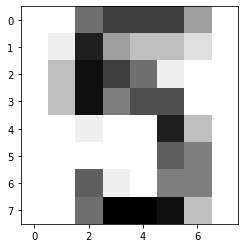

In [9]:
#Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train, y_train)

#Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


In [12]:
# Varying Number of Neighbors 

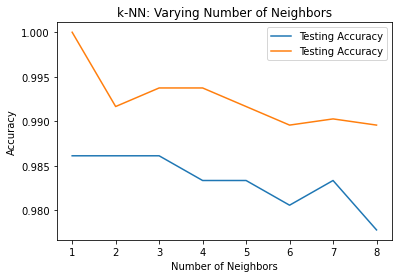

In [13]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of k
for i, k in enumerate(neighbors):
    #Setup a k-NN Classifier with k neighbors: k-nn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
# Classification with deep learning 

In [15]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [16]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [17]:
print('Number of training examples', mnist.data.shape)
print('Image information', mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x1A95D845A00>, 5)


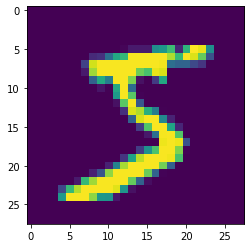

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28,10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [20]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [21]:
def train():
    learning_rate = 1e-3
    num_epochs = 3    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)    
    for epoch in range(num_epochs):
        for batch_idx, (data,target) in enumerate(train_loader):
            output = net(data)            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            
            if batch_idx % 100 == 0:
                print('Epoch = %f.Batch =%s. Loss = %s' % (epoch,batch_idx,loss.item()))
    return net

In [22]:
net = train()

Epoch = 0.000000.Batch =0. Loss = 2.3557846546173096
Epoch = 0.000000.Batch =100. Loss = 0.9296773672103882
Epoch = 0.000000.Batch =200. Loss = 0.6569220423698425
Epoch = 0.000000.Batch =300. Loss = 0.446041077375412
Epoch = 0.000000.Batch =400. Loss = 0.40590208768844604
Epoch = 0.000000.Batch =500. Loss = 0.4935562014579773
Epoch = 0.000000.Batch =600. Loss = 0.29504624009132385
Epoch = 0.000000.Batch =700. Loss = 0.4788224995136261
Epoch = 0.000000.Batch =800. Loss = 0.435525506734848
Epoch = 0.000000.Batch =900. Loss = 0.44431182742118835
Epoch = 1.000000.Batch =0. Loss = 0.44433295726776123
Epoch = 1.000000.Batch =100. Loss = 0.20485365390777588
Epoch = 1.000000.Batch =200. Loss = 0.30171307921409607
Epoch = 1.000000.Batch =300. Loss = 0.31147974729537964
Epoch = 1.000000.Batch =400. Loss = 0.15059539675712585
Epoch = 1.000000.Batch =500. Loss = 0.43408113718032837
Epoch = 1.000000.Batch =600. Loss = 0.5050315856933594
Epoch = 1.000000.Batch =700. Loss = 0.27513325214385986
Epoch 

In [23]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print('Correct out of %s' % total, correct.item())
print('Percentage accuracy', correct.item()*100/10000.)

Correct out of 10000 9211
Percentage accuracy 92.11


In [24]:
#Liner Regression

In [25]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read the CSV file into a Dataframe: df
df = pd.read_csv('D:/SEMESTER 2 - YEAR 4/Advanced Data Mining Applications/Lab/Data_Lab4/gapminder.csv')

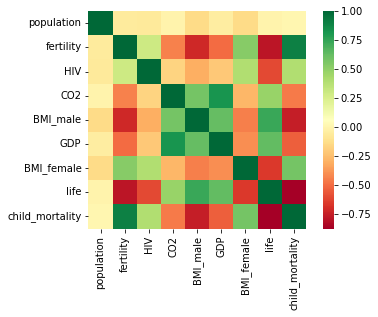

In [26]:
ax = sns.heatmap(df.corr(), square=True, cmap=plt.cm.RdYlGn)
plt.show()

0.6162438752151919


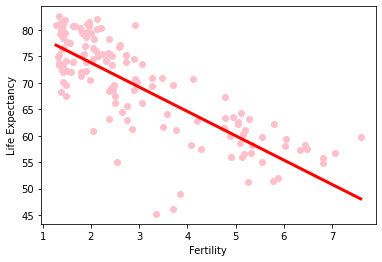

In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color='pink')
plt.plot(prediction_space, y_predict, color='red', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [28]:
features = pd.read_csv('D:/SEMESTER 2 - YEAR 4/Advanced Data Mining Applications/Lab/Data_Lab4/gapminder.csv')
df = pd.read_csv('D:/SEMESTER 2 - YEAR 4/Advanced Data Mining Applications/Lab/Data_Lab4/gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all =LinearRegression()

reg_all.fit(x_train, y_train)

print(reg_all.score(features, y_life))

0.8914651485793137


In [29]:
#Linear Regression using Pytorch

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

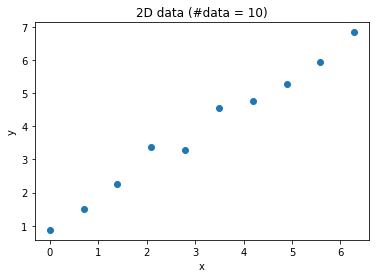

In [31]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [32]:
import torch

In [33]:
#Data set

In [34]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]),
            'label': torch.tensor([self.y[idx]])
        }
        return sample


In [35]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])


0 tensor([1., 0.], dtype=torch.float64) tensor([0.8734], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.5053], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.2654], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.3816], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.2937], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.5612], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.7694], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.2739], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.9333], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.8403], dtype=torch.float64)


In [36]:
#Data Loader

In [37]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [38]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples:')
    pp.pprint(samples)


batch# = 0
samples:
{'feature': tensor([[1.0000, 2.7925],
        [1.0000, 4.1888],
        [1.0000, 0.0000],
        [1.0000, 2.0944]], dtype=torch.float64),
 'label': tensor([[3.2937],
        [4.7694],
        [0.8734],
        [3.3816]], dtype=torch.float64)}

batch# = 1
samples:
{'feature': tensor([[1.0000, 6.2832],
        [1.0000, 5.5851],
        [1.0000, 0.6981],
        [1.0000, 4.8869]], dtype=torch.float64),
 'label': tensor([[6.8403],
        [5.9333],
        [1.5053],
        [5.2739]], dtype=torch.float64)}

batch# = 2
samples:
{'feature': tensor([[1.0000, 1.3963],
        [1.0000, 3.4907]], dtype=torch.float64),
 'label': tensor([[2.2654],
        [4.5612]], dtype=torch.float64)}


In [39]:
#Model

In [40]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [41]:
#Setting a model for out problem

In [42]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [43]:
#Cost function

In [44]:
cost = nn.MSELoss()

In [45]:
#Minimizing the cost function

In [46]:
num_epochs = 10
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=0)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'].float())
        error = cost(predictions, samples['label'].float())
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))    
        optimiser.zero_grad()
        
        error.backward()
        
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 2.556344509124756
	Batch = 1, Error = 3.508997917175293
	Batch = 2, Error = 1.5906903743743896
Epoch = 1
	Batch = 0, Error = 0.628192126750946
	Batch = 1, Error = 0.4101501405239105
	Batch = 2, Error = 0.04242906719446182
Epoch = 2
	Batch = 0, Error = 0.2890893220901489
	Batch = 1, Error = 0.1764228343963623
	Batch = 2, Error = 0.1468101441860199
Epoch = 3
	Batch = 0, Error = 0.23818939924240112
	Batch = 1, Error = 0.19224733114242554
	Batch = 2, Error = 0.08543210476636887
Epoch = 4
	Batch = 0, Error = 0.14293189346790314
	Batch = 1, Error = 0.0923507809638977
	Batch = 2, Error = 0.47154557704925537
Epoch = 5
	Batch = 0, Error = 0.1639818549156189
	Batch = 1, Error = 0.03933527320623398
	Batch = 2, Error = 0.4000396728515625
Epoch = 6
	Batch = 0, Error = 0.11575808376073837
	Batch = 1, Error = 0.13233165442943573
	Batch = 2, Error = 0.2930182218551636
Epoch = 7
	Batch = 0, Error = 0.1060759574174881
	Batch = 1, Error = 0.11897467821836472
	Batch = 2, Erro

In [47]:
#Lets see how well the model has learnt the data

In [48]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


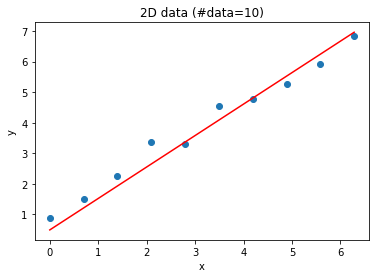

In [49]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data=%d)' % N)
plt.show()

In [50]:
#Recommendation Systems

In [110]:
M_result = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [1,2,1,2],
 [4,3,2,4]])
pd.DataFrame(M_result)
M = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [np.nan,2,1,np.nan],
 [4,3,np.nan,np.nan],
# [1,1,1,1],
 ])
print(M.shape)
print(np.nanmean(M, axis=0))
pd.DataFrame(M)

(4, 4)
[3.  2.5 2.  2. ]


,0,1,2,3
0,4.0,3.0,2.0,3.0
1,1.0,2.0,3.0,1.0
2,NaN,2.0,1.0,NaN
3,4.0,3.0,NaN,NaN


In [103]:
import math
def cosine_similarity(v1,v2,metric = 'cosine'):
    if metric == 'correlation':
        v1 = v1 - np.nanmean(v1)
        v2 = v2 - np.nanmean(v2)
    sumxx,sumxy,sumyy =0,0,0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        if np.isnan(x) or np.isnan(y):continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy / math.sqrt(sumxx*sumyy)

def sim_matrix(M,dimension = 'user',metric = 'cosine'):
    N = M.shape[0] if dimension == 'user' else M.shape[1]
    sim = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i==j:
                sim[i,j] = 0
                continue
            if dimension == 'user':
                v1,v2 = M[i,:],M[j,:]
            else:
                v1,v2 = M[:,i],M[:,j]
            sim[i][j] = cosine_similarity(v1,v2,metric)
    return sim               
            

In [104]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
    return pred

            

In [105]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,j] - avg_ratings)) / sum(sim_items[j])
    return pred

In [106]:
def evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine'):
 if method == 'user_cf':
     prediction = user_cf(ratings, metric)
 else:
     prediction = item_cf(ratings, metric)
     MSE = mean_squared_error(prediction, groundtruth)
     RMSE = round(math.sqrt(MSE),3)
     print("RMSE using {0} approach ({2}) is: {1}".format(method, RMSE, metric))
     print(pd.DataFrame(prediction))
     return

In [107]:
evaluateRS(M, M_result, 'user_cf', 'cosine')
evaluateRS(M, M_result, 'user_cf', 'correlation')
evaluateRS(M, M_result, 'item_cf', 'cosine')
evaluateRS(M, M_result, 'item_cf', 'correlation')

RMSE using item_cf approach (cosine) is: 0.707
     0    1    2    3
0  4.0  3.0  2.0  3.0
1  1.0  2.0  3.0  1.0
2  3.0  2.0  1.0  2.0
3  4.0  3.0  2.0  2.0
RMSE using item_cf approach (correlation) is: 0.707
     0    1    2    3
0  4.0  3.0  2.0  3.0
1  1.0  2.0  3.0  1.0
2  3.0  2.0  1.0  2.0
3  4.0  3.0  2.0  2.0


In [108]:
def evaluate_rank(ratings, groundtruth, method='user_cf', metric='cosine'):
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    n_users = ratings.shape
    avg_tau = 0
    for i in range(n_users):
        tau, p_value = stats.kendalltau(M_result[i,:], prediction[i,:])
        avg_tau += tau
    avg_tau = avg_tau / n_users
    clear_output(wait=True)
    return avg_tau

In [109]:
result = []
for method in ['user_cf', 'item_cf']:
    for metric in ['cosine', 'correlation']:
        rank_acc = evaluate_rank(M, M_result, method, metric)
        results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
print("\n".join(results))

TypeError: 'tuple' object cannot be interpreted as an integer

In [58]:
# Exercise 1: Classification
#In this part, you will be working with the Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set).  

 
#     •Compare the accuracy of the classifier in the plot. 
#     •Classify using deep learning with CNN (1 plus) 


In [ ]:
#Load this dataset from scikit-learn  

In [59]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = load_iris()
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
data = iris['data']
df = pd.DataFrame(data=data, columns=["Sepal length", "Sepal width","Petal length","Petal width"])
df

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
iris_class = iris.target.reshape(-1,1)
df['class']= iris_class
df

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
#Classify using kNN with different k and simple neural network as described in Classification section.

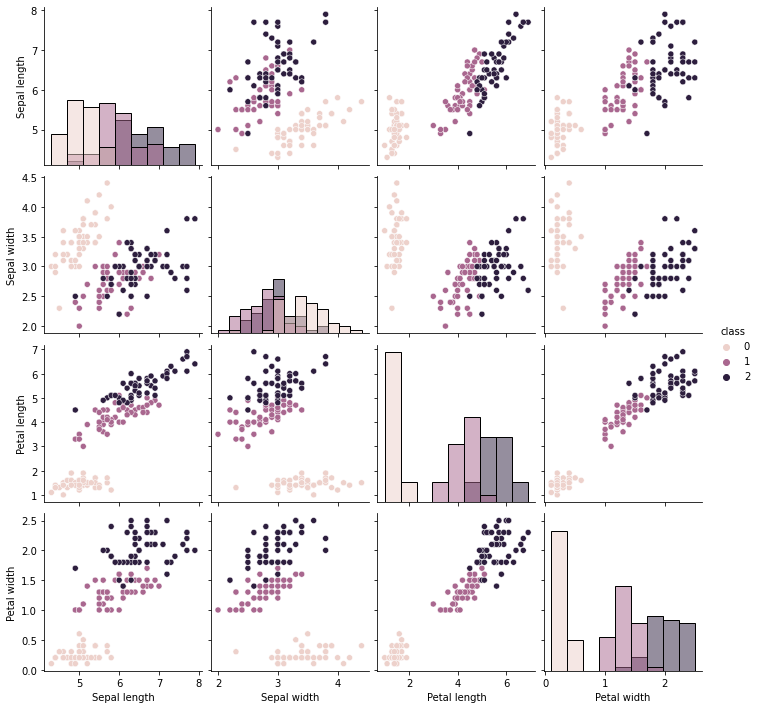

In [64]:
sns.pairplot(df,hue='class',diag_kind="hist")

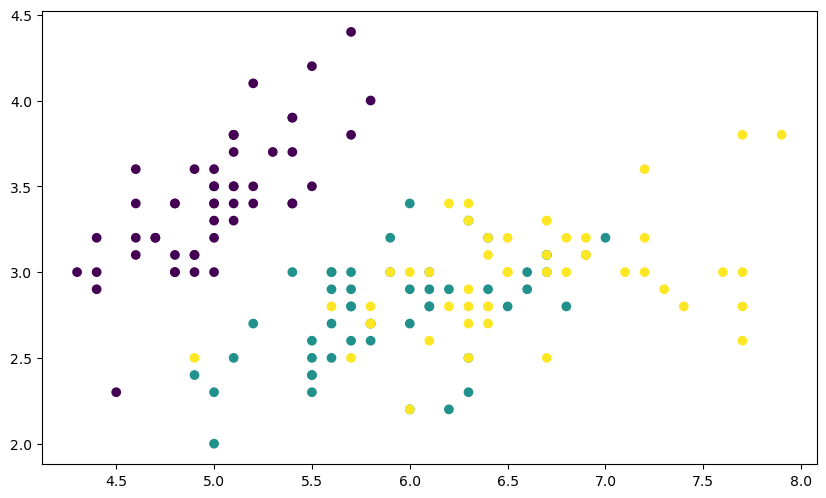

In [65]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=100)
plt.scatter(df["Sepal length"],df['Sepal width'],c=iris.target)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(df,iris.target,test_size=0.3,random_state=0,stratify=iris.target)

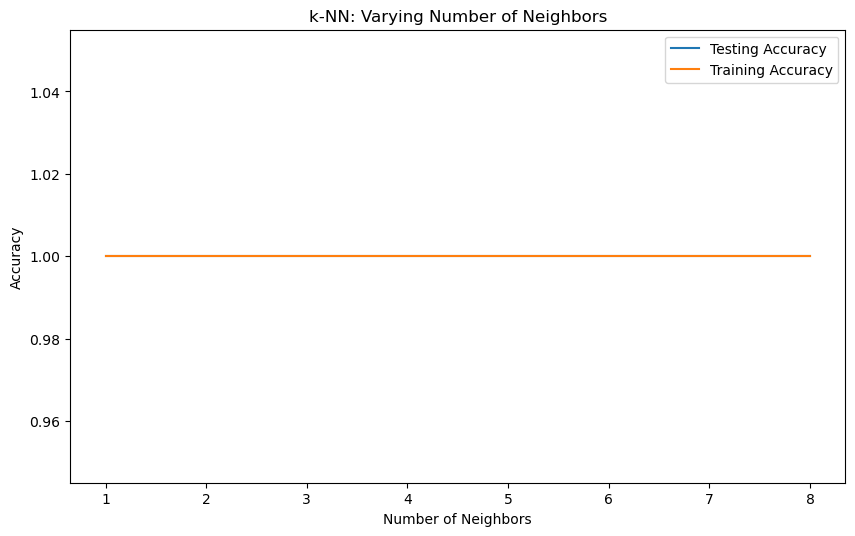

In [69]:
neighbors= np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i , k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
figure(figsize=(10, 6), dpi=100)
plt.title("k-NN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy,label ='Testing Accuracy')
plt.plot(neighbors, train_accuracy,label = "Training Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Accuracy")
plt.show()

In [113]:
#Recommendation System:

In [ ]:
movies_df = pd.read_csv('movies.csv',encoding='latin-1')
ratings_df = pd.read_csv('ratings.csv')
users_df = pd.read_csv('users.csv')

In [114]:
movies_df.dropna()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
94,95,Broken Arrow (1996),Action|Thriller
95,96,In the Bleak Midwinter (1995),Comedy
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


In [115]:
movies_df = movies_df.dropna(axis=0)
users_df = users_df.dropna(axis=0)
ratings_df = ratings_df.dropna(axis=0)

In [117]:
ratings_df

,user_id,movie_id,rating
0,1,1,3
1,1,3,5
2,1,4,4
3,1,5,3
4,1,6,3
...,...,...,...
7507,100,96,4
7508,100,97,4
7509,100,98,5
7510,100,99,5


In [116]:
movies_df.isnull().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [131]:
#Vectorize the relationship between movies and genres  and put them into Ij. 

In [118]:
def find_genres(x,listGen):
    arr = x.split("|")
    for i in arr:
        isIn= False
        for j in listGen:
            if(j ==i):
                isIn=True
        if(isIn==False):
            listGen.append(i)
    

In [119]:
def relaBetweenMovAndGen(x):
    temp = []
    for i in listGen:
        if i in x:
            temp.append(1)
        else:
            temp.append(0)
    Ij.append(temp)


In [120]:
#a.Content-Based Recommendation Model 

In [121]:
listGen = []
movies_df['genres'].apply(find_genres,listGen=listGen)
listGen

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical']

In [122]:
Ij=[]
movies_df['genres'].apply(relaBetweenMovAndGen)
Ij[:4]

[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [123]:
users_df

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,2460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer
...,...,...,...,...,...,...,...
95,96,F,25,16,78028,25-34,self-employed
96,97,F,35,3,66210,35-44,clerical/admin
97,98,F,35,7,33547,35-44,executive/managerial
98,99,F,1,10,19390,Under 18,K-12 student


In [130]:
#❖	Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, he/she has the related history with the movies’genres). 

In [124]:
def finduserGen(movies_id,users_genres):
    movies_arr = movies_id.split('|')
    movies_arr = [eval(x) for x in movies_arr]
    user_genres=[]
    for i in movies_arr:
        a = movies_df.loc[movies_df['movie_id'] == i]
        if(a.empty):
            continue
        else:
            genres = a.values[0,2].split('|')
            for k in genres:
                isIn= False
                for l in user_genres:
                    if(k ==l):
                        isIn=True
                if(isIn==False):
                    user_genres.append(k)
    users_genres.append(user_genres)

In [125]:
ratings_df['movie_id']=ratings_df['movie_id'].astype(str)

new_ratings = ratings_df.sort_values(['user_id'],ascending=False).groupby(['user_id'], as_index=False).agg({'movie_id': '|'.join})
new_ratings

,user_id,movie_id
0,1,42|31|32|34|35|36|37|39|45|43|44|28|46|47|48|4...
1,2,37|28|29|30|31|35|36|45|40|41|25|49|50|51|52|5...
2,3,30|39|31|32|33|34|35|36|38|46|40|41|42|43|44|4...
3,4,46|32|34|35|37|39|40|43|44|49|47|48|29|50|1|52...
4,5,40|28|29|33|34|35|36|39|44|41|43|45|46|47|48|2...
...,...,...
95,96,26|28|29|30|31|34|36|41|38|39|40|43|44|46|24|4...
96,97,41|28|32|33|34|35|36|39|40|44|42|43|26|45|46|4...
97,98,36|27|28|30|31|33|34|35|40|37|39|23|41|43|44|4...
98,99,43|33|35|36|37|38|39|41|52|44|45|48|49|50|51|3...


In [126]:
def relaBetweenUsrAndGen(users_genres,listGen):
    usrRelaGens=[]
    for i in users_genres:
        temp=[]
        a = ' '.join(map(str, i))
        for j in listGen:
            if(j in a):
                temp.append(1)
            else:
                temp.append(0)
        usrRelaGens.append(temp)
    return usrRelaGens

In [127]:
users_genres=[]
new_ratings['movie_id'].apply(finduserGen,users_genres=users_genres)
Uj=relaBetweenUsrAndGen(users_genres,listGen)
Uj[:4]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]]

In [129]:
#Compute the cosine_similarity between movies and users. Hint: you can use sklearn.metrics.pairwise and cosine_similarity for quick calculation. 

In [128]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
cosine_sim = cosine_similarity(Ij,Uj)
cosine_sim

array([[0.46291005, 0.46291005, 0.4472136 , ..., 0.46291005, 0.4472136 ,
        0.4472136 ],
       [0.46291005, 0.46291005, 0.4472136 , ..., 0.46291005, 0.4472136 ,
        0.4472136 ],
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837],
       ...,
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837],
       [0.26726124, 0.26726124, 0.25819889, ..., 0.26726124, 0.25819889,
        0.25819889],
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837]])